#### –£—Å—Ç–∞–Ω–æ–≤—â–∏–∫–∏

!pip install kaggle
from google.colab import files
files.upload()

!pip install ultralytics

from google.colab import drive
drive.mount('/content/drive')

#### –ò–º–ø–æ—Ä—Ç –¥–∞—Ç–∞—Å–µ—Ç–∞

In [3]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download fareselmenshawii/face-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/fareselmenshawii/face-detection-dataset
License(s): CC0-1.0
 99% 4.41G/4.43G [00:47<00:00, 247MB/s]
100% 4.43G/4.43G [00:47<00:00, 99.9MB/s]


In [8]:
!unzip /content/face-detection-dataset.zip -d /content/dataset

–í—ã—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –±—ã–ª–∏ –æ–±—Ä–µ–∑–∞–Ω—ã –¥–æ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –ø–æ—Å–ª–µ–¥–Ω–∏—Ö —Å—Ç—Ä–æ–∫ (5000).
  inflating: /content/dataset/labels2/b0a96b76a58c433c.txt  
  inflating: /content/dataset/labels2/b0abd92b73ecb406.txt  
  inflating: /content/dataset/labels2/b0b880a17aeb2905.txt  
  inflating: /content/dataset/labels2/b0b9a9952976e42b.txt  
  inflating: /content/dataset/labels2/b0bfe0f426275870.txt  
  inflating: /content/dataset/labels2/b0c2f74e1fed9b71.txt  
  inflating: /content/dataset/labels2/b0c4491f61005387.txt  
  inflating: /content/dataset/labels2/b0c4ccd19b83f4c6.txt  
  inflating: /content/dataset/labels2/b0c66e943f050df1.txt  
  inflating: /content/dataset/labels2/b0c9eb2a1f9aa986.txt  
  inflating: /content/dataset/labels2/b0cf4af0df03be90.txt  
  inflating: /content/dataset/labels2/b0d51a66b2c3abeb.txt  
  inflating: /content/dataset/labels2/b0d9501aa2380861.txt  
  inflating: /content/dataset/labels2/b0d97c088f04e8b1.txt  
  inflating: /content/data

In [9]:
import yaml

data = {
    'train': '/content/dataset/images/train',
    'val': '/content/dataset/images/val',
    'test': '/content/dataset/images/val',  # –µ—Å–ª–∏ –Ω–µ—Ç test, –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ val
    'nc': 1,  # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–æ–≤ (–∑–∞–º–µ–Ω–∏—Ç–µ –Ω–∞ –≤–∞—à–µ)
    'names': ['Human face']  # –∏–º–µ–Ω–∞ –∫–ª–∞—Å—Å–æ–≤ (–∑–∞–º–µ–Ω–∏—Ç–µ –Ω–∞ –≤–∞—à–∏)
}

# –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ñ–∞–π–ª
with open('/content/data.yaml', 'w') as f:
    yaml.dump(data, f, default_flow_style=False)

# –ü—Ä–æ–≤–µ—Ä—è–µ–º —Å–æ–¥–µ—Ä–∂–∏–º–æ–µ
!cat /content/data.yaml

names:
- Human face
nc: 1
test: /content/dataset/images/val
train: /content/dataset/images/train
val: /content/dataset/images/val


In [40]:
import os
from pathlib import Path

def get_dataset_stats(data_yaml_path):
    # –ß–∏—Ç–∞–µ–º YAML —Ñ–∞–π–ª
    with open(data_yaml_path, 'r') as f:
        data_config = yaml.safe_load(f)

    # –ü–æ–ª—É—á–∞–µ–º –ø—É—Ç–∏
    train_path = data_config['train']
    val_path = data_config['val']

    # –°—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
    def count_images(folder_path):
        if not os.path.exists(folder_path):
            return 0
        image_extensions = ['.jpg', '.jpeg', '.png', '.bmp']
        count = 0
        for ext in image_extensions:
            count += len(list(Path(folder_path).glob(f'*{ext}')))
            count += len(list(Path(folder_path).glob(f'*{ext.upper()}')))
        return count

    train_count = count_images(train_path)
    val_count = count_images(val_path)

    # –°—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∞–Ω–Ω–æ—Ç–∞—Ü–∏–π (–ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º —Ñ–æ—Ä–º–∞—Ç YOLO)
    def count_annotations(folder_path):
        if not os.path.exists(folder_path):
            return 0
        annotations_path = folder_path.replace('images', 'labels')
        if os.path.exists(annotations_path):
            return len(list(Path(annotations_path).glob('*.txt')))
        return 0

    train_annotations = count_annotations(train_path)
    val_annotations = count_annotations(val_path)

    return {
        'train_images': train_count,
        'val_images': val_count,
        'train_annotations': train_annotations,
        'val_annotations': val_annotations,
        'classes': data_config['nc'],
        'class_names': data_config['names']
    }

# –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ
stats = get_dataset_stats('/content/data.yaml')
print("–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞:")
print(f"–û–±—É—á–∞—é—â–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è: {stats['train_images']}")
print(f"–í–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è: {stats['val_images']}")
print(f"–û–±—É—á–∞—é—â–∏–µ –∞–Ω–Ω–æ—Ç–∞—Ü–∏–∏: {stats['train_annotations']}")
print(f"–í–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã–µ –∞–Ω–Ω–æ—Ç–∞—Ü–∏–∏: {stats['val_annotations']}")
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–æ–≤: {stats['classes']}")
print(f"–ò–º–µ–Ω–∞ –∫–ª–∞—Å—Å–æ–≤: {stats['class_names']}")

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞:
–û–±—É—á–∞—é—â–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è: 13386
–í–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è: 3347
–û–±—É—á–∞—é—â–∏–µ –∞–Ω–Ω–æ—Ç–∞—Ü–∏–∏: 13386
–í–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã–µ –∞–Ω–Ω–æ—Ç–∞—Ü–∏–∏: 3347
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–æ–≤: 1
–ò–º–µ–Ω–∞ –∫–ª–∞—Å—Å–æ–≤: ['Human face']


#### –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫

In [10]:
from ultralytics import YOLO
import torch
import pandas as pd
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ‚úÖ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


#### –ò–º–ø–æ—Ä—Ç –º–æ–¥–µ–ª–∏ –∏ –æ–±—É—á–µ–Ω–∏–µ

In [11]:
# –ú–µ—Å—Ç–æ –¥–ª—è —Ä–∞—Å—á–µ—Ç–∞ –º–æ–¥–µ–ª–∏
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
DEVICE

'cuda'

In [12]:
# –í—ã–±–æ—Ä –º–æ–¥–µ–ª–∏
model = YOLO("yolo11m.pt")

In [13]:
# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
results = model.train(
    data="/content/data.yaml",
    epochs=5,
    imgsz=640,
    batch=8,
    device=DEVICE
    )

Ultralytics 8.3.201 üöÄ Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrai

# –î–æ–æ–±—É—á–µ–Ω–∏–µ
results = model.train(
    data='/content/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    device='cuda' if torch.cuda.is_available() else 'cpu',
    patience=10,
    lr0=0.001,  # –Ω–∞—á–∞–ª—å–Ω–∞—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è
    lrf=0.01,   # –∫–æ–Ω–µ—á–Ω–∞—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è
    weight_decay=0.0005,
    warmup_epochs=3,
    augment=True,  # –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è
    save=True,
    save_period=10,
    project='yolo11-face-detection',
    name='exp1'
)

In [15]:
# –ó–∞–ø–∏—à–µ–º –∏—Ç–æ–≥–∏ –ø–æ —ç–ø–æ—Ö–∞–º–∏ –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
model_metrics = pd.read_csv('/content/runs/detect/train/results.csv')

In [18]:
model_metrics

epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   639.596         1.39206         1.05589         1.25365   
1      2  1207.620         1.34919         0.95635         1.24054   
2      3  1774.040         1.28852         0.86696         1.20546   
3      4  2341.840         1.24078         0.77878         1.16855   
4      5  2911.000         1.18475         0.69913         1.13332   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.88124            0.59870           0.69932   
1               0.85912            0.72655           0.80519   
2               0.86585            0.75140           0.82612   
3               0.87070            0.77522           0.84713   
4               0.88209            0.80267           0.87249   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.43267       1.37886       0.99292       1.28363  0.000666   
1              0.50501       1.30199       0.80705       1.22440  0.001069   
2              0.52457       1.26619       0.73522       1.19254  0.001208   
3              0.54482       1.23354       0.67235       1.16916  0.000812   
4              0.57144       1.17357       0.59922       1.12954  0.000416   

     lr/pg1    lr/pg2  
0  0.000666  0.000666  
1  0.001069  0.001069  
2  0.001208  0.001208  
3  0.000812  0.000812  
4  0.000416  0.000416

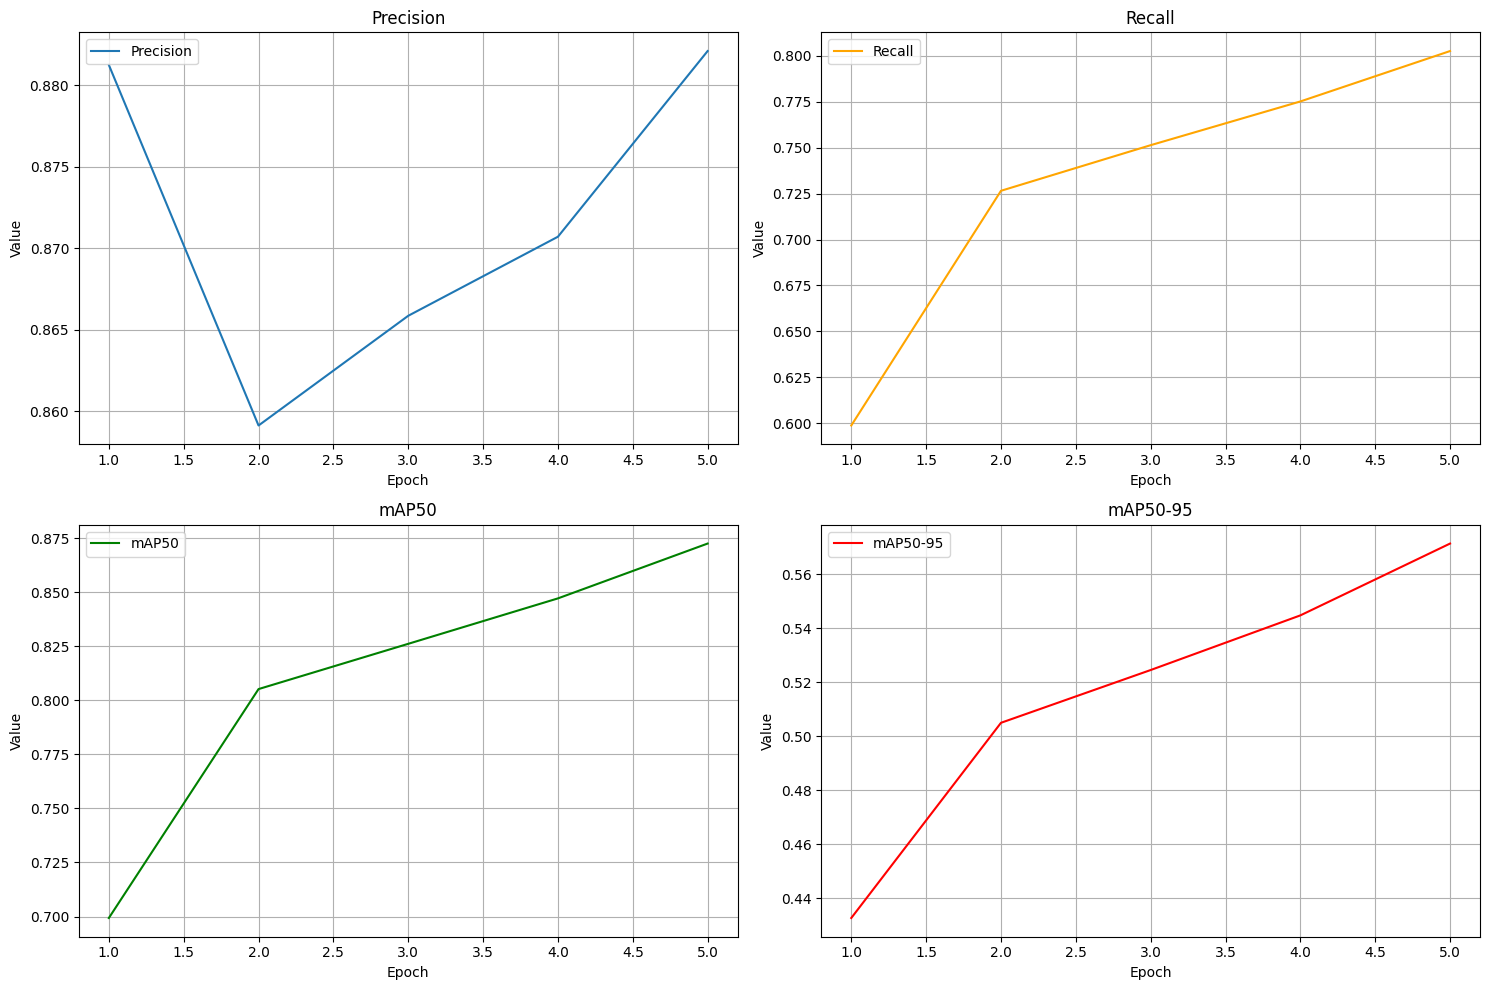

In [16]:
# –ì—Ä–∞—Ñ–∏–∫–∏ –º–µ—Ç—Ä–∏–∫
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# –¢–æ—á–Ω–æ—Å—Ç—å (precision)
axes[0, 0].plot(model_metrics['epoch'], model_metrics['metrics/precision(B)'], label='Precision')
axes[0, 0].set_title('Precision')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Value')
axes[0, 0].legend()
axes[0, 0].grid(True)

# –ü–æ–ª–Ω–æ—Ç–∞ (recall)
axes[0, 1].plot(model_metrics['epoch'], model_metrics['metrics/recall(B)'], label='Recall', color='orange')
axes[0, 1].set_title('Recall')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Value')
axes[0, 1].legend()
axes[0, 1].grid(True)

# mAP50
axes[1, 0].plot(model_metrics['epoch'], model_metrics['metrics/mAP50(B)'], label='mAP50', color='green')
axes[1, 0].set_title('mAP50')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Value')
axes[1, 0].legend()
axes[1, 0].grid(True)

# mAP50-95
axes[1, 1].plot(model_metrics['epoch'], model_metrics['metrics/mAP50-95(B)'], label='mAP50-95', color='red')
axes[1, 1].set_title('mAP50-95')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Value')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [24]:
# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
import os
import shutil

# –ü—É—Ç–∏ –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è
training_folder = '/content/runs/detect/train/'
drive_training_path = '/content/drive/MyDrive/Colab_Notebooks/models/face_detection/v1'
os.makedirs(drive_training_path, exist_ok=True)

# –ö–æ–ø–∏—Ä—É–µ–º –≤—Å—é –ø–∞–ø–∫—É
shutil.copytree(training_folder, drive_training_path, dirs_exist_ok=True)
print(f"–ü–æ–ª–Ω–∞—è –ø–∞–ø–∫–∞ –æ–±—É—á–µ–Ω–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞: {drive_training_path}")

–ü–æ–ª–Ω–∞—è –ø–∞–ø–∫–∞ –æ–±—É—á–µ–Ω–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞: /content/drive/MyDrive/Colab_Notebooks/models/face_detection/v1


#### –í–∞–ª–∏–¥–∞—Ü–∏—è

In [26]:
# –í–∞–ª–∏–¥–∞—Ü–∏—è –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
val_results = model.val(
    data='/content/data.yaml',
    split='val',  # –∏–ª–∏ 'test'
    batch=8,
    imgsz=640,
    conf=0.25,  # –ø–æ—Ä–æ–≥ —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç–∏
    iou=0.45,   # –ø–æ—Ä–æ–≥ IoU
    device=DEVICE
)

# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫
print(f"mAP50-95: {val_results.box.map:.3f}")
print(f"mAP50: {val_results.box.map50:.3f}")
print(f"Precision: {val_results.box.mp:.3f}")
print(f"Recall: {val_results.box.mr:.3f}")

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –≤ —Ñ–∞–π–ª
val_results.save_dir = '/content/runs/val/metrics'
print(f"–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤: {val_results.save_dir}")

Ultralytics 8.3.201 üöÄ Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 1433.9¬±846.6 MB/s, size: 239.2 KB)
val: Scanning /content/dataset/labels/val.cache... 3347 images, 0 backgrounds, 0 corrupt: 100% ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3347/3347 7.9Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 419/419 5.1it/s 1:21
                   all       3347      10299      0.883      0.809      0.885       0.63
Speed: 0.2ms preprocess, 20.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /content/runs/detect/train3
mAP50-95: 0.630
mAP50: 0.885
Precision: 0.883
Recall: 0.809
–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤: /content/runs/val/metrics


WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.


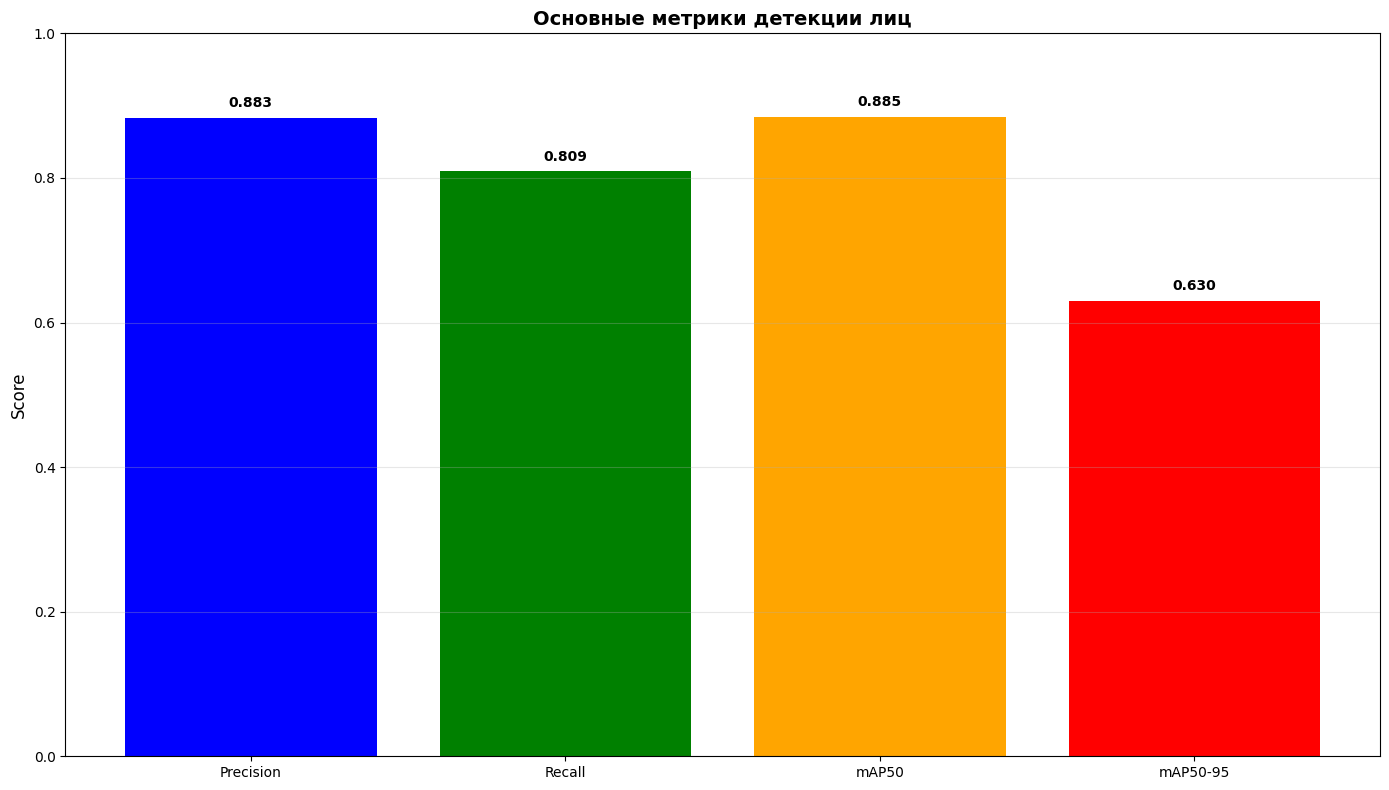

WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.


In [48]:
def simple_metrics_print(val_results):
    """
    –ü—Ä–æ—Å—Ç–∞—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–ª—è –¥–µ—Ç–µ–∫—Ü–∏–∏ –ª–∏—Ü —Å –æ—Å–Ω–æ–≤–Ω—ã–º–∏ –º–µ—Ç—Ä–∏–∫–∞–º–∏ –∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π –æ –¥–∞—Ç–∞—Å–µ—Ç–µ
    """
    plt.figure(figsize=(14, 8))

    # –û—Å–Ω–æ–≤–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏
    plt.subplot(1, 1, 1)
    metrics = ['Precision', 'Recall', 'mAP50', 'mAP50-95']
    values = [val_results.box.mp, val_results.box.mr, val_results.box.map50, val_results.box.map]
    colors = ['blue', 'green', 'orange', 'red']

    bars = plt.bar(metrics, values, color=colors)
    plt.ylabel('Score', fontsize=12)
    plt.title('–û—Å–Ω–æ–≤–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ –¥–µ—Ç–µ–∫—Ü–∏–∏ –ª–∏—Ü', fontsize=14, fontweight='bold')
    plt.ylim(0, 1)
    plt.grid(True, axis='y', alpha=0.3)

    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{value:.3f}', ha='center', va='bottom', fontweight='bold')


    #plt.axis('on')

    plt.tight_layout()
    #plt.savefig('/content/runs/val/face_detection_metrics.png', dpi=300, bbox_inches='tight')
    plt.show()

# –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ
simple_metrics_print(val_results)

#### –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è

WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.

Found https://img.freepik.com/free-vector/hand-drawn-people-waving-illustrated_23-2149202067.jpg locally at hand-drawn-people-waving-illustrated_23-2149202067.jpg
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
image 1/1 /content/hand-drawn-people-waving-illustrated_23-2149202067.jpg: 448x640 4 Human faces, 29.1ms
Speed: 5.0ms preprocess, 29.1ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.


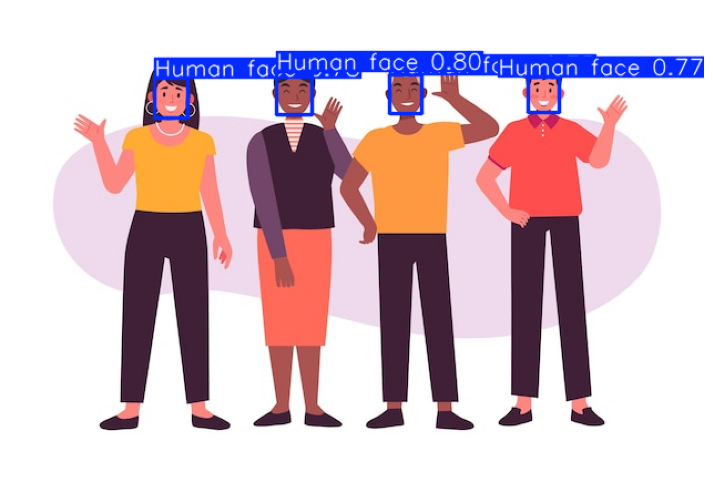

WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.

Found https://st2.depositphotos.com/2927537/7025/i/450/depositphotos_70253417-stock-photo-funny-monkey-with-a-red.jpg locally at depositphotos_70253417-stock-photo-funny-monkey-with-a-red.jpg
image 1/1 /content/depositphotos_70253417-stock-photo-funny-monkey-with-a-red.jpg: 640x640 (no detections), 39.0ms
Speed: 4.0ms preprocess, 39.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.


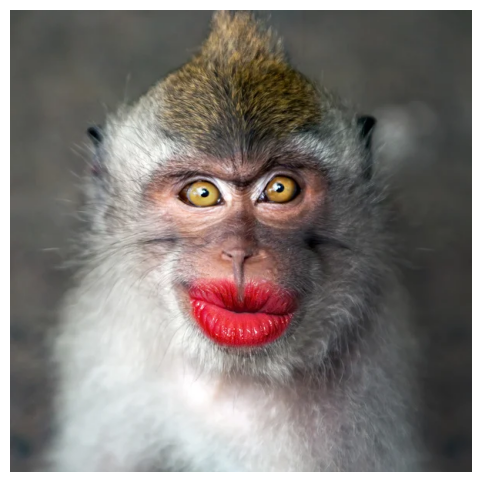

WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.

Found https://rt-online.ru/uploads/old/uploads/2022/01/obezyana.jpg locally at obezyana.jpg
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
image 1/1 /content/obezyana.jpg: 448x640 1 Human face, 30.4ms
Speed: 6.6ms preprocess, 30.4ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.


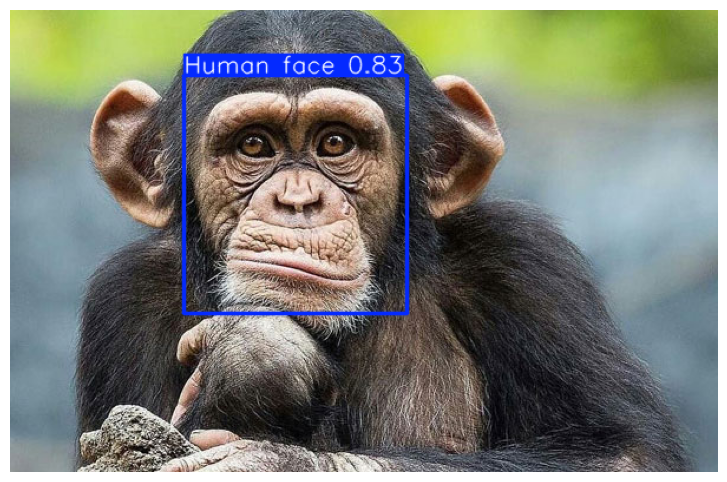


Found https://www.cbssev.ru/images/big5018.jpg locally at big5018.jpg
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
image 1/1 /content/big5018.jpg: 448x640 2 Human faces, 29.1ms
Speed: 3.3ms preprocess, 29.1ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unre

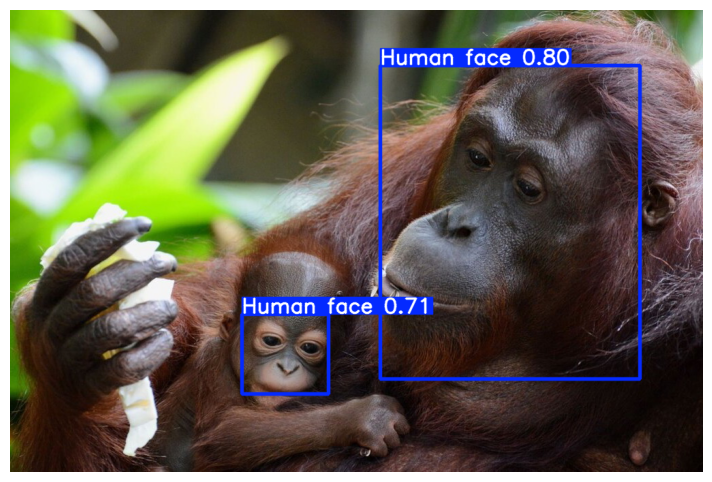


WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.
WARNING ‚ö†Ô∏è 

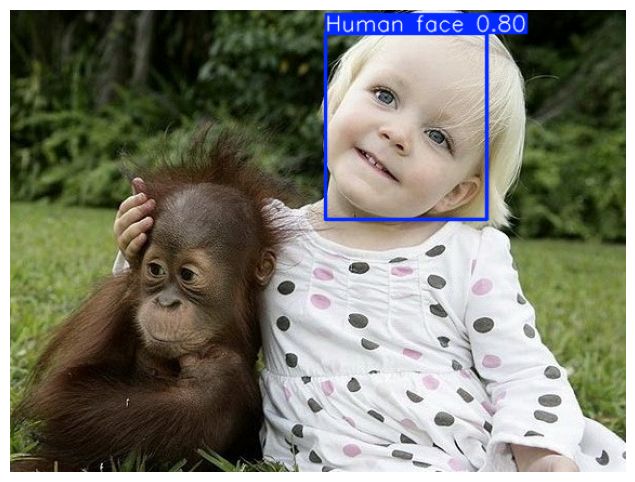

WARNING ‚ö†Ô∏è Video stream unresponsive, please check your IP camera connection.


In [49]:
import cv2

url = "https://img.freepik.com/free-vector/hand-drawn-people-waving-illustrated_23-2149202067.jpg"
url1 = "https://st2.depositphotos.com/2927537/7025/i/450/depositphotos_70253417-stock-photo-funny-monkey-with-a-red.jpg"
url2 = "https://rt-online.ru/uploads/old/uploads/2022/01/obezyana.jpg"
url3 = "https://www.cbssev.ru/images/big5018.jpg"
url4 = "https://www.cbssev.ru/images/big2489.jpg"

image_list = [url, url1, url2, url3, url4]

# –ò–Ω—Ñ–µ—Ä–µ–Ω—Å –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
for url in image_list:
    pred_results = model.predict(url, conf=0.6)

    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
    for result in pred_results:
        img = result.plot()  # –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ —Å –¥–µ—Ç–µ–∫—Ü–∏—è–º–∏
        plt.figure(figsize=(10, 6))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

In [ ]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –ø–æ—Å–ª–µ –æ–±—É—á–µ–Ω–∏—è
best_model = YOLO('runs/train/exp1/weights/best.pt')

# –¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–∞ –æ–¥–Ω–æ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–∏
result = best_model('test_image.jpg', save=True, conf=0.3)

# –ü–æ–ª—É—á–µ–Ω–∏–µ feature maps (–¥–ª—è –∞–Ω–∞–ª–∏–∑–∞)
features = best_model.model.forward(torch.randn(1, 3, 640, 640).to(device))

In [ ]:
# –ü–æ—Å–ª–µ –æ–±—É—á–µ–Ω–∏—è —Å–æ—Ö—Ä–∞–Ω—è–µ–º –ª—É—á—à–∏–µ –≤–µ—Å–∞
best_model_path = '/content/best_face_detection.pt'
model.save(best_model_path)  # –∏–ª–∏ –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –∏–∑ train()